In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# check cv2 version
cv2.__version__

'3.4.2'

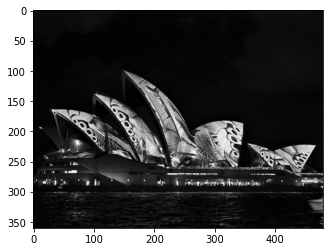

In [3]:
# Using cv2 read the image from the directory
sample_img = cv2.imread("syd_house.jpg",1)
sample_img = cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

In [4]:
# Question 1 Using sift algorithm to get the key points

In [5]:
# Create SIFT without parameter in Question 1 step1
sift_sample_Q1 = cv2.xfeatures2d_SIFT.create()
keypoints_q1, descriptors_q1 = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_Q1,sample_img,None)
print(len(keypoints_q1))

703


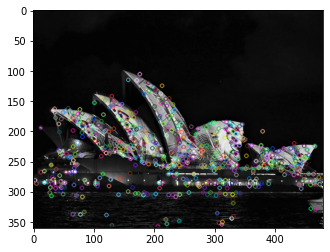

In [6]:
# Q1 show the image with default keypoints
# How to use draw keypoints
# Source: https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html
# Source: https://stackoverflow.com/questions/19748020/visualizing-opencv-keypoints
sift_sample_img_q1 = cv2.drawKeypoints(sample_img,keypoints_q1,np.array([]))
plt.imshow(sift_sample_img_q1)

In [7]:
# contrastTheashold
# the number of keypoints becomes about 1⁄4 of all default keypoints
# The meaning of the parameter in SIFT function
# Source: https://docs.opencv.org/3.4/d7/d60/classcv_1_1SIFT.html
# The lager contrastThreshold, the points we get is more
sift_sample_Q1_quator = cv2.xfeatures2d_SIFT.create(contrastThreshold=0.214)
keypoints_q1_quator, descriptors_q1_quator = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_Q1_quator,sample_img,None)
# This contrast Threshold is 176 which is 1/4 of the total key point 703
print(len(keypoints_q1_quator))

176


True

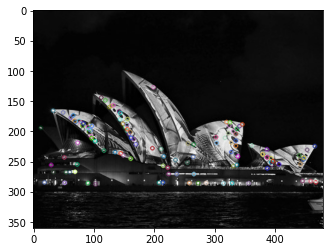

In [8]:
# Get the final image of question1
Question1_final_img = cv2.drawKeypoints(sample_img,keypoints_q1_quator,np.array([]))
plt.imshow(Question1_final_img)
cv2.imwrite("Task1_output.png",Question1_final_img)

In [9]:
# Question 2
# Defining 2 functions: Rotation and center
def rotate(img, x, y, angle):
    """
        img: the input image which needs to be rotated
        x,y: the center point of the image
        angle: the angle need to rotate
    """
    # 1.0 means the size is 1
    # Source: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html
    rot_matrix = cv2.getRotationMatrix2D((x,y), angle, 1.0)
    # How to solve wrong return of getRotationMatrix2D()
    # Source: https://stackoverflow.com/questions/62370352/why-does-rotation-of-an-image-using-cv2-getrotationmatrix2d-and-cv2-warpaffine-r
    h,w = img.shape[:2]
    return cv2.warpAffine(img, rot_matrix, (w,h))

def get_the_center_point(img):
    # This kind of pic is color picture
    # get the previous 2 dimention which is the width and height
    h,w = img.shape[:2]
    center = (h//2, w//2)
    return center

In [10]:
sample_img_center = get_the_center_point(sample_img)
print(sample_img_center)
print(sample_img.shape)

(180, 240)
(360, 480, 3)


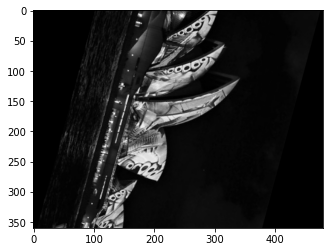

In [11]:
# Question 2 step 1
# Rotating the image to anti-clockwise 255
# 255 means anti clockwise
# -255 means clockwise
rotating_sample_img_255 = rotate(sample_img,sample_img_center[1],sample_img_center[0],255)
plt.imshow(rotating_sample_img_255)

In [12]:
# Same para in Question1
# The lager contrastThreshold, the points we get is more
sift_sample_Q2_quator = cv2.xfeatures2d_SIFT.create(contrastThreshold=0.214)
# How to use detectAndCompute
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
keypoints_q2_quator, descriptors_q2_quator = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_Q2_quator,rotating_sample_img_255,None)
# This contrast Threshold is 176 which is 1/4 of the total key point 703
print(len(keypoints_q2_quator))

113


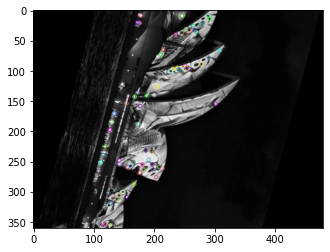

In [13]:
# Question2 Final picture
Question2_final_img = cv2.drawKeypoints(rotating_sample_img_255,keypoints_q2_quator,np.array([]))
plt.imshow(Question2_final_img)

In [14]:
# From the question 2, we can find that when the picture doing the rotation
# It will lost some part, so we cannot get the total keypoint which is 176 in question 1.

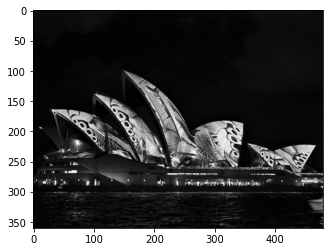

In [29]:
# Question 3
# sample picture
Q3_sample_0 = cv2.imread("syd_house.jpg",1)
Q3_sample_img = cv2.cvtColor(Q3_sample_0,cv2.COLOR_BGR2RGB)

plt.imshow(Q3_sample_img)

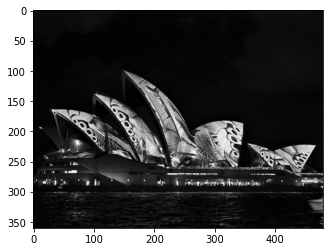

In [31]:
# Question 3
# picture rotate 0
Q3_img_0 = cv2.imread("syd_house.jpg",1)
Q3_img_0 = cv2.cvtColor(Q3_img_0,cv2.COLOR_BGR2RGB)

Q3_rotate_0 = rotate(Q3_img_0,sample_img_center[1],sample_img_center[0],0)
plt.imshow(Q3_rotate_0)

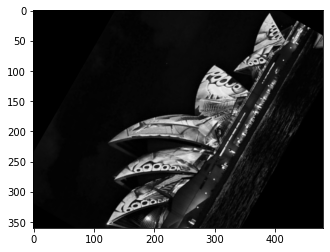

In [32]:
# picture rotate 60
Q3_img_60 = cv2.imread("syd_house.jpg",1)
Q3_img_60 = cv2.cvtColor(Q3_img_60,cv2.COLOR_BGR2RGB)

Q3_rotate_60 = rotate(Q3_img_60,sample_img_center[1],sample_img_center[0],60)
plt.imshow(Q3_rotate_60)

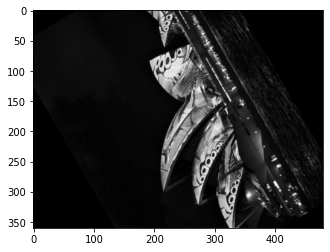

In [33]:
# picture rotate 120
Q3_img_120 = cv2.imread("syd_house.jpg",1)
Q3_img_120 = cv2.cvtColor(Q3_img_120,cv2.COLOR_BGR2RGB)


Q3_rotate_120 = rotate(Q3_img_120,sample_img_center[1],sample_img_center[0],120)
plt.imshow(Q3_rotate_120)

176


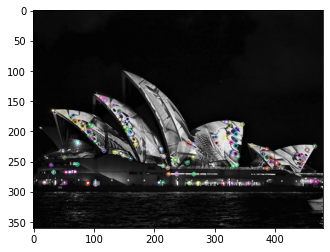

In [60]:
# get the Q3 sample image
# SIFT without contrastThreshold
sift_sample_img_Q3_quator = cv2.xfeatures2d_SIFT.create(contrastThreshold=0.214)

keypoints_q3_img, descriptors_q3_img = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_img_Q3_quator,Q3_sample_img,None)

sift_Question3_img = cv2.drawKeypoints(Q3_sample_img,keypoints_q3_img,np.array([]))

plt.imshow(sift_Question3_img)
print(len(keypoints_q3_img))

171


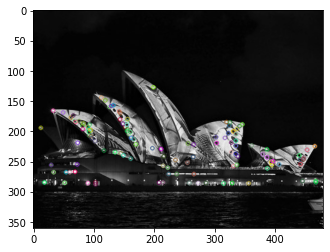

In [61]:
# get the Q3 rotation 0 degree
# SIFT without contrastThreshold
sift_sample_Q3_0 = cv2.xfeatures2d_SIFT.create(contrastThreshold=0.215)

keypoints_q3_0, descriptors_q3_0 = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_Q3_0,Q3_rotate_0,None)

sift_Question3_rotate_0 = cv2.drawKeypoints(Q3_rotate_0,keypoints_q3_0,np.array([]))

plt.imshow(sift_Question3_rotate_0)
print(len(keypoints_q3_0))

132


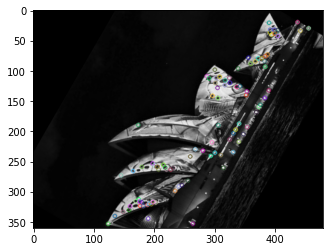

In [62]:
# get the Q3 rotation 60 degree
# SIFT without contrastThreshold
sift_sample_Q3_60 = cv2.xfeatures2d_SIFT.create(contrastThreshold=0.215)
keypoints_q3_60, descriptors_q3_60 = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_Q3_60,Q3_rotate_60,None)
sift_Question3_rotate_60 = cv2.drawKeypoints(Q3_rotate_60,keypoints_q3_60,np.array([]))
plt.imshow(sift_Question3_rotate_60)
# print(len(keypoints_q3_0))
print(len(keypoints_q3_60))

128


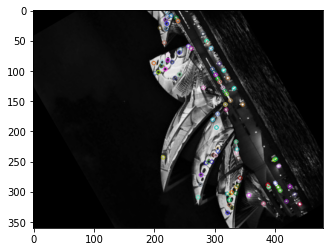

In [63]:
# get the Q3 rotation 120 degree
# SIFT without contrastThreshold
sift_sample_Q3_120 = cv2.xfeatures2d_SIFT.create(contrastThreshold=0.215)
keypoints_q3_120, descriptors_q3_120 = cv2.xfeatures2d_SIFT.detectAndCompute(sift_sample_Q3_120,Q3_rotate_120,None)
sift_Question3_rotate_120 = cv2.drawKeypoints(Q3_rotate_120,keypoints_q3_120,np.array([]))
plt.imshow(sift_Question3_rotate_120)
print(len(keypoints_q3_120))

In [64]:
def draw_line(sift_sample_img_q1,keypoints_q1,descriptors_q1,sift_Question3_rotate,keypoints_q3,descriptors_q3):
    # How to use BFMatcher()
    # Source: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html
    bf_rotate = cv2.BFMatcher()
    # what is knn?
    # Source: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
    matches = bf_rotate.knnMatch(descriptors_q1,descriptors_q3,k=2)
    good_house = list()
    for m,n in matches:
        if m.distance < 0.91 * n.distance:
            good_house.append([m])
    result_rotate = cv2.drawMatchesKnn(sift_sample_img_q1,keypoints_q1,sift_Question3_rotate,keypoints_q3,good_house,None, flags=2)
    return result_rotate

In [65]:
# Get all results
Q3_result_0 = draw_line(sift_Question3_img ,keypoints_q3_img, descriptors_q3_img,sift_Question3_rotate_0,keypoints_q3_0,descriptors_q3_0)
Q3_result_60 = draw_line(sift_Question3_img ,keypoints_q3_img, descriptors_q3_img,sift_Question3_rotate_60,keypoints_q3_60,descriptors_q3_60)
Q3_result_120 = draw_line(sift_Question3_img ,keypoints_q3_img, descriptors_q3_img,sift_Question3_rotate_120,keypoints_q3_120,descriptors_q3_120)

True

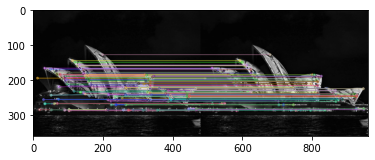

In [66]:
# print and save
plt.imshow(Q3_result_0)
cv2.imwrite("Task3_0_degree.png",Q3_result_0)

True

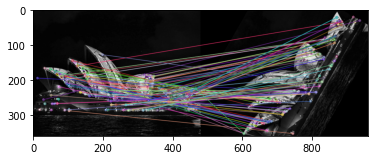

In [67]:
# print and save
plt.imshow(Q3_result_60)
cv2.imwrite("Task3_60_degree.png",Q3_result_60)

True

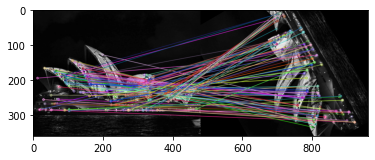

In [68]:
# print and save
plt.imshow(Q3_result_120)
cv2.imwrite("Task3_120_degree.png",Q3_result_120)

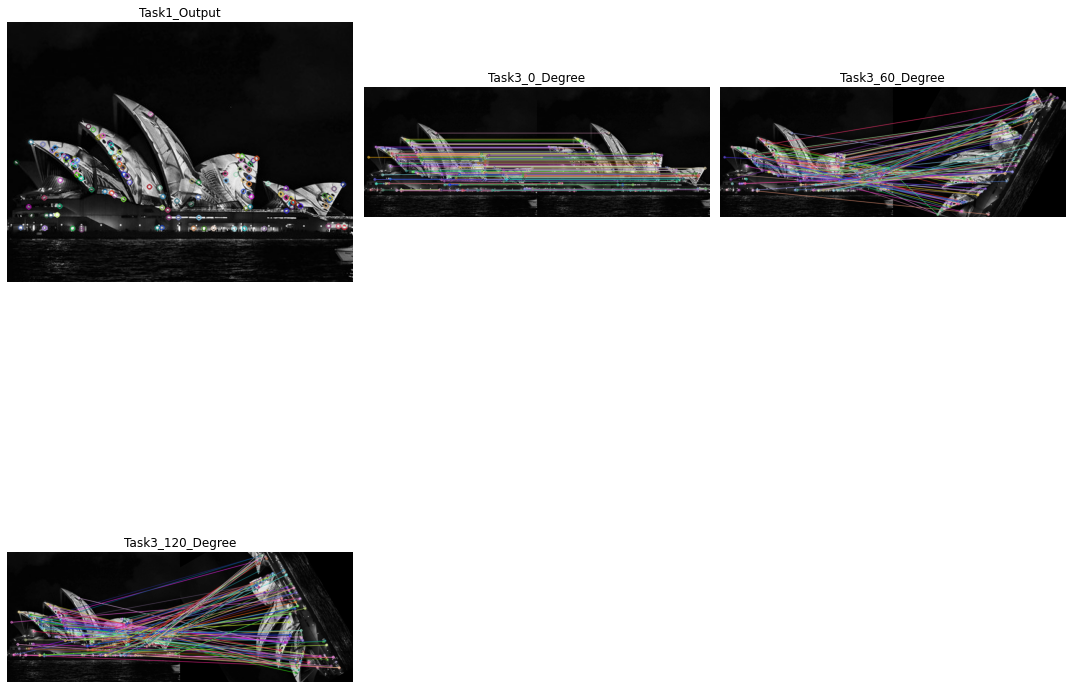

In [69]:
# using fave to save them into one image
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(231)
plt.axis('off')
ax.set_title('Task1_Output')
ax.imshow(Question1_final_img)

ax = fig.add_subplot(232)
plt.axis('off')
ax.set_title('Task3_0_Degree')
ax.imshow(Q3_result_0)

ax = fig.add_subplot(233)
plt.axis('off')
ax.set_title('Task3_60_Degree')
ax.imshow(Q3_result_60)

ax = fig.add_subplot(234)
plt.axis('off')
ax.set_title('Task3_120_Degree')
ax.imshow(Q3_result_120)

fig.tight_layout()
#plt.savefig('./')